K Means Clustering

Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing The Data Set

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
x=df.iloc[:,[3,4]].values
# ! here last variable is not a dependent variable but a feature
# * no dependent variable so no y in clustering
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Using Elbow Method to find the Optimal Clustering Numbers

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


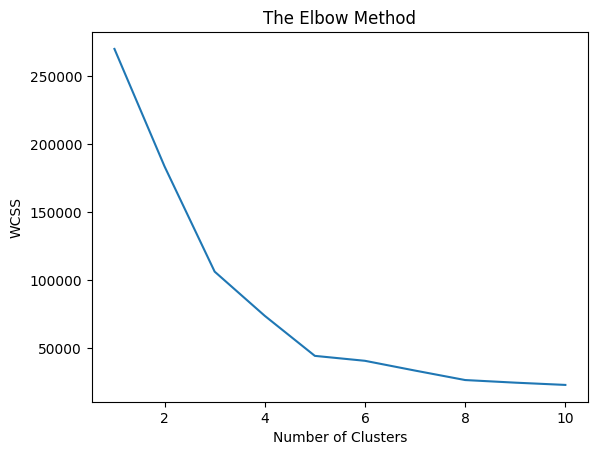

In [51]:
from sklearn.cluster import KMeans
wcss=[]
# ! wcss is cluster sum of squares in the data set
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    # ! 42 is luck and can be changed also
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig("Elbow Method Graph.png")
plt.show()

In [ ]:
# ! we will use  5 clusters as it is the optimal no of clusters

Training the KMeans Clustering Model on the data set

In [27]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(x)
#! fit predict not only fits but also predicts the output 
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing the Clusters

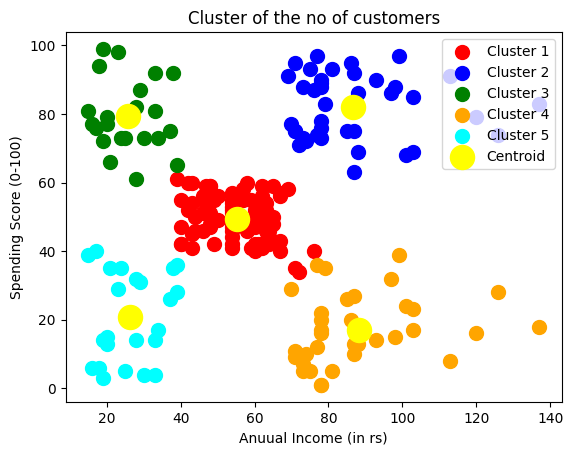

In [50]:
# here x has 2 variables income at 0 and spending score at 1 and the format of selection is row, column 
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label="Cluster 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='orange',label="Cluster 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label="Cluster 5")
# print(kmeans.cluster_centers_)
#! 0 column has x coordinates and y coordinates at 1 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroid")
plt.title("Cluster of the no of customers")
plt.xlabel("Anuual Income (in rs)")
plt.ylabel("Spending Score (0-100)")
plt.legend(loc="upper right")
plt.savefig('Clusters of no of customers.png')
plt.show()